## CA02 - DAT200 spring 2020

#### Fábio Rodrigues Pereira
- fabio.rodrigues.pereira@nmbu.no
- gitlab: @fabiorodp

#### Task:
- From the dataset which describes the medical records for Pima Indians we will predict whether or not each patient will have an onset of diabetes within five years.

In [4]:
# -*- coding: utf-8 -*-
"""
Compulsory Assignment 02 for the course 'DAT200: Applied Machine Learn' at
the University of life science (NMBU) in Ås/Norway.
"""
__author__ = 'Fábio Rodrigues Pereira'
__email__ = 'fabio.rodrigues.pereira@nmbu.no'

# ==========================================================================
# Import modules:
# ==========================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from perceptron_ext import Perceptron
from adaline_ext import AdalineGD

# ==========================================================================
# Load data without header -> data.shape = (768, 9):
# ==========================================================================
data = pd.read_csv("pima-indians-diabetes.data.csv",
                   names=['pregnant times', 'glucose concentration',
                          'blood pressure', 'triceps thickness',
                          '2-hour insulin', 'body mass',
                          'pedigree', 'age', 'target'])

In [5]:
data.head(5)  # visualization

pregnant times  glucose concentration  blood pressure  triceps thickness  \
0               6                    148              72                 35   
1               1                     85              66                 29   
2               8                    183              64                  0   
3               1                     89              66                 23   
4               0                    137              40                 35   

   2-hour insulin  body mass  pedigree  age  target  
0               0       33.6     0.627   50       1  
1               0       26.6     0.351   31       0  
2               0       23.3     0.672   32       1  
3              94       28.1     0.167   21       0  
4             168       43.1     2.288   33       1

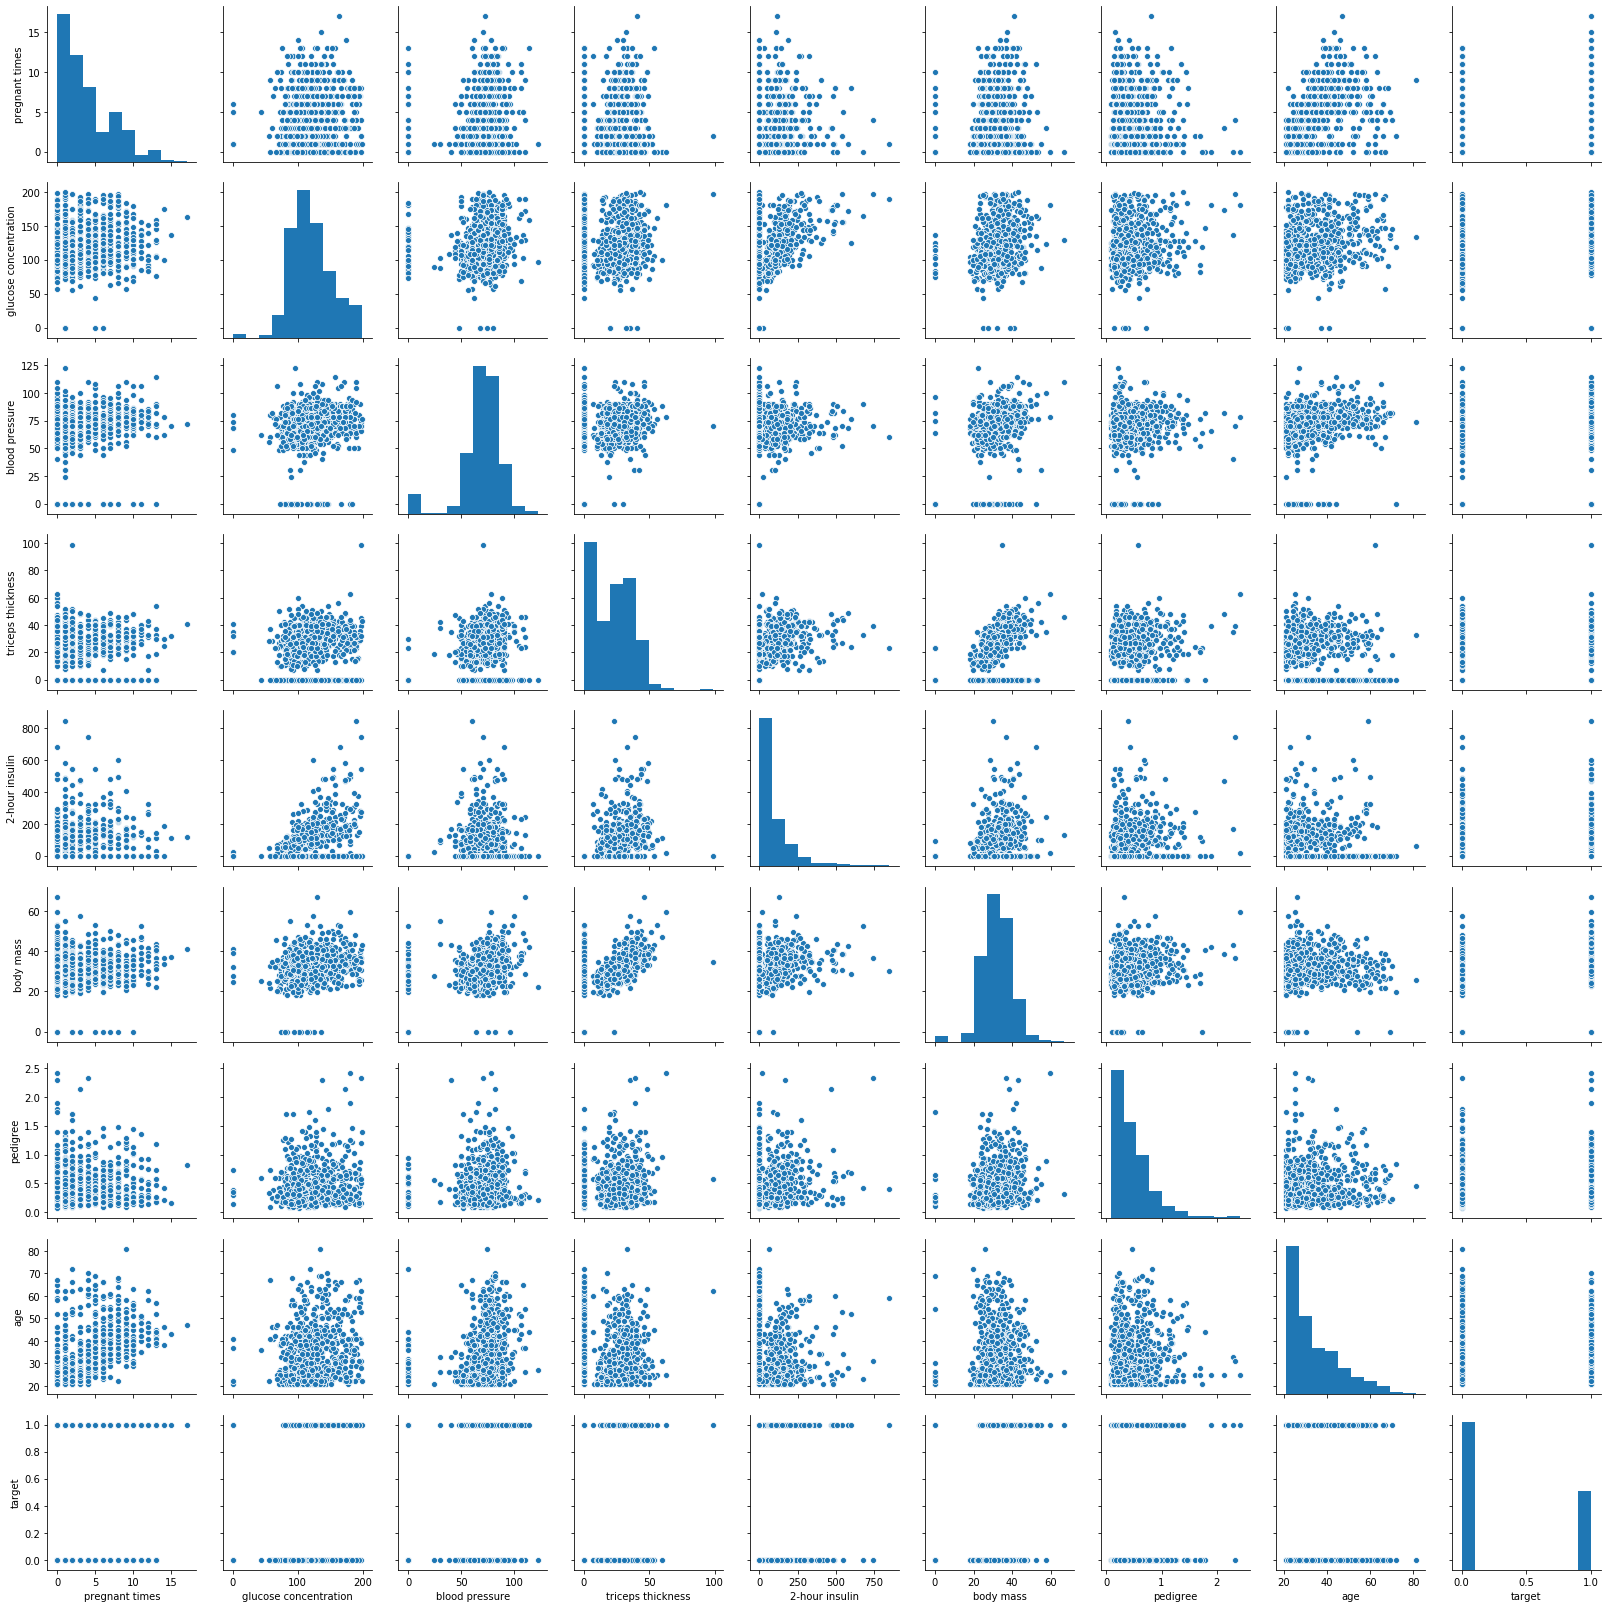

In [6]:
# Plot histograms and scatters:
sns.pairplot(data, kind="scatter")
plt.show()

- I would remove the following below because the variable values seems to 
be unrealistic from the histogram graphs. The training of the remaining 
data would be quicker than the complete data with many unreliable values. 

'pregnant times': remove the Xs >= 15;
'glucose concentration': remove Xs = 0;
'blood pressure': remove Xs = 0;
'triceps thickness': everything seems ok;
'2-hour insulin': Since many people have 0, then it will not be removed, 
even though it seems unreliable;
'body mass': remove Xs = 0;
'pedigree': everything seems ok;
'age': everything seems ok;
'target': everything seems ok.

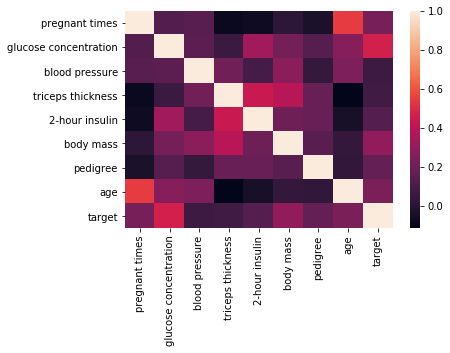

In [7]:
# Heatmap with the correlation between the variables:
sns.heatmap(data.corr())
plt.show()

- We can not identify any apparently high correlation between the variables 
from the Heatmap or scatter graphs. However 'glucose concentration' and 
'body mass' have the highest correlation between the target we want to 
predict, then it could be relevant and faster to try a Machine Learning 
algorithm with these to variables to try a faster predict of our target.

In [10]:
# ==========================================================================
# Task 2: Identify 0 values in 'body mass' and 'blood pressure' variables
# and remove the respective rows -> data.shape = (729, 9):
# ==========================================================================

data.drop(index=(data[data['body mass'] == 0].index.tolist() +
                 data[data['blood pressure'] == 0].index.tolist()),
          inplace=True)

In [11]:
# ==========================================================================
# Task 3: First train 400 models (8 subsets of 50, 100, 150, 200, 250, 300,
# 350, 400 patients vs from 1 to 50 epochs) for each Perceptron and
# AdalineGD. Then predict the unseen data for each model. Store the
# results in a (8x50) array:
# ==========================================================================

# Batches and epochs ranges:
batchs, epochs = range(50, 401, 50), range(1, 51)

# List (8) of arrays (batches,) containing the 8 training subsets of Xs & Ys:
train_X = list(map(lambda i: data.drop('target', axis=1)[:i].values, batchs))
train_Y = list(map(lambda i: data['target'][:i].values, batchs))

# Array (329,8) with the unseen Xs & Ys:
test_X = data.drop('target', axis=1).tail(len(data) - 400).values
test_Y = data.target.tail(len(data) - 400).values

# ******* It was wrong here************************************************
# Standardise train_Xis:
# train_mean = np.mean(train_X[7], axis=0)
# train_std = np.std(train_X[7], axis=0)
# train_X = list(map(lambda i: (i - train_mean) / train_std, train_X))
# *************************************************************************

# ********* It should be correct now***************************************
# Standardise train_Xis:
train_X = list(map(lambda i, z: (i - np.mean(train_X[z], axis=0))
                   / np.std(train_X[z], axis=0), train_X, range(8)))
# *************************************************************************

# Standardise test_X:
test_X = (test_X - np.mean(test_X, axis=0)) / np.std(test_X, axis=0)

# Convert any target value into 1 and -1:
train_Y = list(map(lambda i: np.where(i == 1, 1, -1), train_Y))
test_Y = np.where(test_Y == 1, 1, -1)

# Train the 400 Perceptron models:
pptron_models = [list(map(lambda i:
                          Perceptron(eta=0.0001,
                                     n_iter=i,
                                     random_state=123).fit(Xi, Yi), epochs))
                 for Xi, Yi in zip(train_X, train_Y)]

# Train the 400 Adaline models:
adaline_models = [list(map(lambda i:
                           AdalineGD(eta=0.0001,
                                     n_iter=i,
                                     random_state=123).fit(X, Y), epochs))
                  for X, Y in zip(train_X, train_Y)]

# Compute the test set classification accuracy for Perceptron:
pptron_pred = []
for a in range(8):
    for b in range(50):
        result = pptron_models[a][b].predict(test_X)
        tt_correct = (result == test_Y).sum()
        idx = tt_correct / len(test_Y)
        pptron_pred.append(idx)
pptron_pred = np.array(pptron_pred).reshape(8, 50)

# Compute the test set classification accuracy for AdalineGD:
adl_pred = []
for a in range(8):
    for b in range(50):
        result = adaline_models[a][b].predict(test_X)
        tt_correct = (result == test_Y).sum()
        idx = tt_correct / len(test_Y)
        adl_pred.append(idx)
adl_pred = np.array(adl_pred).reshape(8, 50)

In [12]:
print(pptron_pred)

[[0.57446809 0.62917933 0.63525836 0.64133739 0.64741641 0.63221884
  0.6231003  0.61094225 0.61094225 0.61702128 0.6231003  0.62917933
  0.63221884 0.6231003  0.61702128 0.62006079 0.61094225 0.60486322
  0.59574468 0.59270517 0.58054711 0.59878419 0.60486322 0.60486322
  0.60790274 0.6231003  0.60790274 0.62613982 0.74164134 0.6231003
  0.53191489 0.62006079 0.60486322 0.67173252 0.61094225 0.65349544
  0.58358663 0.65349544 0.69300912 0.72948328 0.69604863 0.556231
  0.61398176 0.63829787 0.60790274 0.62917933 0.64133739 0.69300912
  0.62006079 0.56838906]
 [0.6231003  0.67173252 0.68693009 0.68693009 0.72340426 0.72036474
  0.70820669 0.70212766 0.70212766 0.70212766 0.73860182 0.78115502
  0.76899696 0.76595745 0.76291793 0.76291793 0.73860182 0.74164134
  0.69604863 0.75987842 0.75683891 0.75379939 0.76595745 0.75379939
  0.75379939 0.7325228  0.76595745 0.77203647 0.77203647 0.7781155
  0.78419453 0.77203647 0.74772036 0.71428571 0.75075988 0.73860182
  0.74468085 0.79027356 0.7

In [13]:
print(adl_pred)

[[0.57142857 0.63525836 0.67781155 0.67781155 0.69300912 0.7112462
  0.71732523 0.73556231 0.75075988 0.74468085 0.74164134 0.73556231
  0.7325228  0.72948328 0.72948328 0.72036474 0.72340426 0.71732523
  0.71732523 0.71732523 0.71732523 0.72340426 0.72036474 0.71428571
  0.70820669 0.70820669 0.70516717 0.70516717 0.70212766 0.70212766
  0.70516717 0.70516717 0.70820669 0.70820669 0.70820669 0.70820669
  0.70820669 0.70820669 0.70820669 0.70820669 0.70516717 0.70516717
  0.70516717 0.70516717 0.70516717 0.70516717 0.70820669 0.70820669
  0.70820669 0.70820669]
 [0.61398176 0.70212766 0.71732523 0.73556231 0.75075988 0.74468085
  0.74468085 0.75379939 0.75075988 0.76291793 0.75987842 0.76291793
  0.76291793 0.76899696 0.76899696 0.76899696 0.76899696 0.77507599
  0.7781155  0.7781155  0.7781155  0.7781155  0.7781155  0.7781155
  0.7781155  0.78115502 0.78115502 0.78419453 0.78419453 0.78115502
  0.78115502 0.78115502 0.78419453 0.78419453 0.78115502 0.78115502
  0.78115502 0.78115502 0

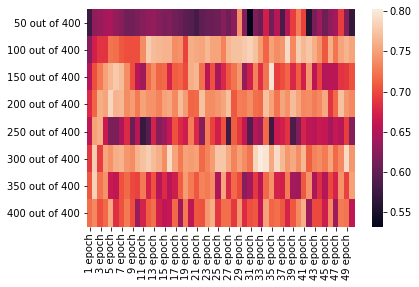

In [14]:
# ==========================================================================
# Task 4: Plot the heatmaps:
# ==========================================================================
index = ["{} out of 400".format(i) for i in batchs]
columns = ["{} epoch".format(i) for i in epochs]

# Heatmap for the Perceptron's test set classification accuracies:
df_ppt_pred = pd.DataFrame(pptron_pred, index=index, columns=columns)
sns.heatmap(df_ppt_pred)
plt.show()

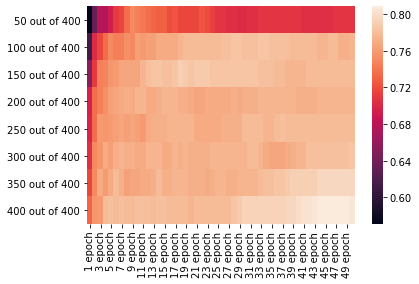

In [15]:
# Heatmap for the adaline's test set classification accuracies:
df_adl_pred = pd.DataFrame(adl_pred, index=index, columns=columns)
sns.heatmap(df_adl_pred)
plt.show()

In [16]:
# ==========================================================================
# Task 5:
"""Provide the maximum test set classification accuracy for each, the 
perceptron classifier and the adaline classifier and information on with 
which combination of number training data samples and number of epochs the 
best classification accuracy was achieved."""
# ==========================================================================

# Perceptron's maximum test set classification accuracy:
print("The max Perceptron accuracy: {:.2f}%".format(pptron_pred.max()*100))

# Column & row of the Perceptron's maximum classification accuracy:
ppt_maxs = np.where(pptron_pred == pptron_pred.max())

for j, i in zip(ppt_maxs[0], ppt_maxs[1]):
    print("The max accuracy on: " + columns[i] + " and " + index[j] +
          " subset")

The max Perceptron accuracy: 80.24%
The max accuracy on: 33 epoch and 300 out of 400 subset


In [17]:
# Adaline's maximum test set classification accuracy:
print("The max Adaline accuracy: {:.2f}%".format(adl_pred.max()*100))

# Column & row of the Adaline's maximum classification accuracy:
adl_maxs = np.where(adl_pred == adl_pred.max())

for j, i in zip(adl_maxs[0], adl_maxs[1]):
    print("The max accuracy on: " + columns[i] + " and " + index[j] +
          " subset")

The max Adaline accuracy: 80.85%
The max accuracy on: 44 epoch and 400 out of 400 subset
The max accuracy on: 45 epoch and 400 out of 400 subset
The max accuracy on: 46 epoch and 400 out of 400 subset
The max accuracy on: 47 epoch and 400 out of 400 subset
The max accuracy on: 48 epoch and 400 out of 400 subset
The max accuracy on: 49 epoch and 400 out of 400 subset


## Task 6:
- The training time of the simpler perceptron algorithm is quite a bit 
longer than the training time of the adaline algorithm. What might be the 
reason for this?

- Training time with perceptron algorithm is longer because it updates the weights immediately when every single prediction error occurs in each row. In other hand, Adaline is faster because it only updates the weights after a complete epoch (all rows) has been precessed, then it uses the gradient decedent technique to update the weights.